In [40]:
import os.path
import pandas as pd
import joblib
raw_documents = []
snippets = []


In [41]:
docs = pd.read_csv('../../DATA/NEW_ALL_RELIGION_FULL_POST.csv')
# docs = pd.read_csv('../../DATA/NEW_ALL_VIDEO_GAMES.csv')
# docs = docs[docs.GAME == 'Smite']
docs = docs[docs.RELIGION == 'hinduism']
# docs = docs[docs['POST/COMMENT']=='POST']
docs['CONTENT'] = docs['CONTENT'].astype(str)
docs = docs['CONTENT'].tolist()
raw_documents = docs
len(raw_documents)

for i in raw_documents[:4]:
    print(raw_documents)
    print('------')

['Is there any god who Rules Video Games, TV Shows, Movies, Comics and Entertainment as a Whole?Been wondering about this for a while. After chatting with a bunch of people on an IRC chatroom and later going off topic with a few like Tezukaist, Galanthus, TechEmporium, and a few others on stuff outside of spellcasting, is there a god who rules entertainment? Specifically are there specific patrons for TV series, films, comic books, and video games as individual separate rulers for each of the aforementioned subjects?\n\nOr would you have to analyze and assign old gods? Like say a goddess of theater like Indra to cinema (since thats the closest thing ancient civilizations had to movies)?', 'It looks like you flaired your post as a "beginner question", so you may be new to Hinduism. Please visit our Wiki Starter Pack [here](https://www.reddit.com/r/hinduism/wiki/starter_pack) if you have not already, as you may find some useful resources there to help you on your spiritual journey:  http

In [42]:
custom_stop_words = []
with open( "stopwords.txt", "r" ) as fin:
    for line in fin.readlines():
        custom_stop_words.append( line.strip() )
# note that we need to make it hashable
print("Stopword list has %d entries" % len(custom_stop_words) )

Stopword list has 355 entries


In [43]:
from sklearn.feature_extraction.text import CountVectorizer
# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = custom_stop_words, max_df = 0.8, min_df = 5)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1494 X 2357 document-term matrix


In [44]:

terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 2357 distinct terms


In [45]:
joblib.dump((A,terms,snippets), "2018_Reddit_Post-raw.pkl")

['2018_Reddit_Post-raw.pkl']

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
# we can pass in the same preprocessing parameters
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, max_df = 0.8, min_df = 5)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d TF-IDF-normalized document-term matrix" % (A.shape[0], A.shape[1]) )

Created 1494 X 2357 TF-IDF-normalized document-term matrix


In [47]:
# extract the resulting vocabulary
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 2357 distinct terms


In [48]:
import operator
def rank_terms( A, terms ):
    # get the sums over each column
    sums = A.sum(axis=0)
    # map weights to the terms
    weights = {}
    for col, term in enumerate(terms):
        weights[term] = sums[0,col]
    # rank the terms by their weight over all documents
    return sorted(weights.items(), key=operator.itemgetter(1), reverse=True)

In [49]:
ranking = rank_terms( A, terms )
for i, pair in enumerate( ranking ):
    print( "%02d. %s (%.2f)" % ( i+1, pair[0], pair[1] ) )

01. game (64.03)
02. deleted (39.08)
03. hinduism (33.68)
04. god (31.04)
05. looks (28.07)
06. good (26.88)
07. hindu (26.52)
08. life (22.21)
09. people (22.10)
10. com (21.91)
11. gods (21.90)
12. please (21.76)
13. play (21.56)
14. video (21.55)
15. know (19.91)
16. really (19.90)
17. karma (19.63)
18. get (19.37)
19. amazing (18.17)
20. see (18.11)
21. think (17.45)
22. world (16.88)
23. mind (15.97)
24. games (15.79)
25. want (15.58)
26. time (15.47)
27. shiva (15.31)
28. great (15.06)
29. beautiful (14.51)
30. something (14.35)
31. based (14.04)
32. krishna (13.75)
33. religion (13.66)
34. man (13.30)
35. love (13.07)
36. keep (12.78)
37. way (12.61)
38. self (12.46)
39. try (12.34)
40. idea (12.18)
41. gita (12.01)
42. reddit (11.87)
43. better (11.86)
44. dharma (11.81)
45. link (11.79)
46. real (11.60)
47. go (11.58)
48. guru (11.26)
49. thank (11.26)
50. wiki (11.20)
51. cool (11.19)
52. lord (11.11)
53. believe (11.10)
54. nice (11.08)
55. definitely (10.99)
56. work (10.92

In [50]:
joblib.dump((A,terms,snippets), "2018_Reddit_Post-tfidf.pkl")

['2018_Reddit_Post-tfidf.pkl']

In [51]:

(A,terms,snippets) = joblib.load( "2018_Reddit_Post-tfidf.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )

Loaded 1494 X 2357 document-term matrix


In [52]:
kmin, kmax = 1, 15

In [53]:
from sklearn import decomposition
topic_models = []
# try each value of k
for k in range(kmin,kmax+5):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = decomposition.NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform( A )
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=1 ...
Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...
Applying NMF for k=11 ...
Applying NMF for k=12 ...
Applying NMF for k=13 ...
Applying NMF for k=14 ...
Applying NMF for k=15 ...
Applying NMF for k=16 ...
Applying NMF for k=17 ...
Applying NMF for k=18 ...
Applying NMF for k=19 ...


In [54]:
import re
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok )
            yield tokens



In [55]:
import gensim
docgen = TokenGenerator( raw_documents, custom_stop_words )
# the model has 500 dimensions, the minimum document-term frequency is 2
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=2, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [56]:
w2v_model.save("2018_Reddit_Post-w2v-model.bin")

In [57]:
def calculate_coherence(w2v_model, term_rankings):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations(term_rankings[topic_index], 2):
            try:
                pair_scores.append(w2v_model.wv.similarity(pair[0], pair[1]))
            except KeyError:
                # ignore pairs where one or both words are not in vocabulary
                if pair[0] not in w2v_model.wv.key_to_index or pair[1] not in w2v_model.wv.key_to_index:
                    pass
                else:
                    raise
        # get the mean for all pairs in this topic
        if pair_scores:
            topic_score = sum(pair_scores) / len(pair_scores)
            overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)


In [58]:
import numpy as np
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms


In [59]:
from itertools import combinations
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( terms, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=01: Coherence=0.6169
K=02: Coherence=0.6799
K=03: Coherence=0.7281
K=04: Coherence=0.7572
K=05: Coherence=0.7723
K=06: Coherence=0.8256
K=07: Coherence=0.8149
K=08: Coherence=0.8214
K=09: Coherence=0.8392
K=10: Coherence=0.8281
K=11: Coherence=0.8280
K=12: Coherence=0.8357
K=13: Coherence=0.8511
K=14: Coherence=0.8457
K=15: Coherence=0.8493
K=16: Coherence=0.8532
K=17: Coherence=0.8549
K=18: Coherence=0.8658
K=19: Coherence=0.8495


In [60]:

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
matplotlib.rcParams.update({"font.size": 14})


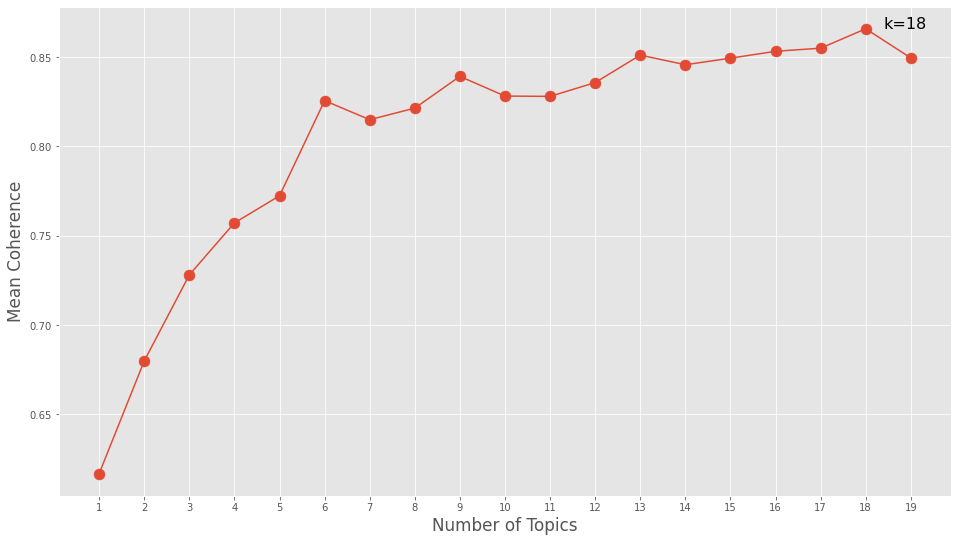

In [61]:
fig = plt.figure(figsize=(16,9))
# create the line plot
plt.tick_params(labelsize=10)
ax = plt.plot( k_values, coherences )
plt.xticks(k_values)
plt.xlabel("Number of Topics")
plt.ylabel("Mean Coherence")
# add the points
plt.scatter( k_values, coherences, s=120)
# find and annotate the maximum point on the plot
ymax = max(coherences)
xpos = coherences.index(ymax)
best_k = k_values[xpos]
plt.annotate( "k=%d" % best_k, xy=(best_k, ymax), xytext=(best_k, ymax), textcoords="offset points", fontsize=16)
# show the plot
plt.show()

In [64]:
k = best_k
# get the model that we generated earlier.
W = topic_models[k-kmin][1]
H = topic_models[k-kmin][2]



for topic_index in range(k):
    descriptor = get_descriptor( terms, H, topic_index, 10 )
    str_descriptor = ", ".join( descriptor )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: deleted, com, keeps, snakes, list, reply, detailed, getting, youtube, watch
Topic 02: world, dream, brahman, reality, real, self, mind, advaita, consciousness, experiences
Topic 03: comment, image, link, please, sub, removed, submission, thank, provide, namaste
Topic 04: game, great, video, smite, try, bullshit, played, dice, based, btw
Topic 05: com, hinduism, reddit, wiki, resources, start, comments, introductory, visit, text
Topic 06: looks, interesting, awesome, something, time, beautiful, wait, hope, cool, great
Topic 07: god, shiva, believe, krishna, evil, world, vishnu, human, reincarnation, avatars
Topic 08: amazing, goosebumps, gave, work, legend, damn, thank, release, looks, making
Topic 09: karma, soul, body, souls, check, youtu, actions, life, experience, bad
Topic 10: life, people, get, guru, time, things, know, krishna, think, go
Topic 11: hindu, gods, video, games, epic, raji, ancient, mythology, india, goddesses
Topic 12: beautiful, nice, work, honestly, voice

In [67]:
(A,terms,snippets) = joblib.load( "2018_Reddit_Post-tfidf.pkl" )
print( "Loaded %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )


Loaded 1494 X 2357 document-term matrix


In [68]:
from sklearn import decomposition
model = decomposition.NMF( init="nndsvd", n_components=k ) 
# apply the model and extract the two factor matrices
W = model.fit_transform( A )
H = model.components_

In [69]:
W.shape


# In[ ]:


# round to 2 decimal places for display purposes
W[0,:].round(2)


# In[ ]:


H.shape

(18, 2357)

In [74]:
term_index = terms.index('raji')
# round to 2 decimal places for display purposes
H[:,term_index].round(2)

array([0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.3 ,
       0.13, 0.06, 0.  , 0.  , 0.  , 0.  , 0.  ])

In [75]:
import numpy as np
def get_descriptor( terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
    return top_terms

In [76]:
descriptors = []
for topic_index in range(k):
    descriptors.append( get_descriptor( terms, H, topic_index, 10 ) )
    str_descriptor = ", ".join( descriptors[topic_index] )
    print("Topic %02d: %s" % ( topic_index+1, str_descriptor ) )

Topic 01: deleted, com, keeps, snakes, list, reply, detailed, getting, youtube, watch
Topic 02: world, dream, brahman, reality, real, self, mind, advaita, consciousness, experiences
Topic 03: comment, image, link, please, sub, removed, submission, thank, provide, namaste
Topic 04: game, great, video, smite, try, bullshit, played, dice, based, btw
Topic 05: com, hinduism, reddit, wiki, resources, start, comments, introductory, visit, text
Topic 06: looks, interesting, awesome, something, time, beautiful, wait, hope, cool, great
Topic 07: god, shiva, believe, krishna, evil, world, vishnu, human, reincarnation, avatars
Topic 08: amazing, goosebumps, gave, work, legend, damn, thank, release, looks, making
Topic 09: karma, soul, body, souls, check, youtu, actions, life, experience, bad
Topic 10: life, people, get, guru, time, things, know, krishna, think, go
Topic 11: hindu, gods, video, games, epic, raji, ancient, mythology, india, goddesses
Topic 12: play, definitely, wait, love, keep, su

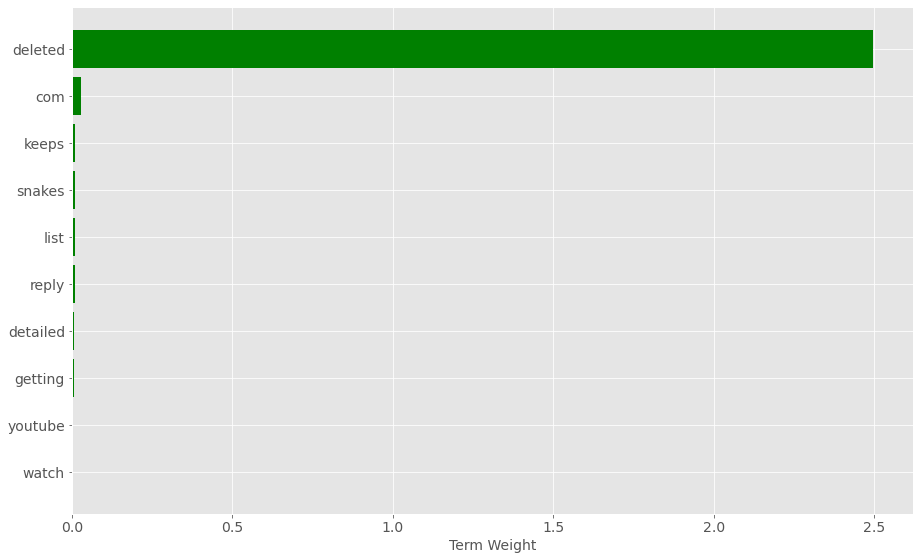

In [77]:
def plot_top_term_weights( terms, H, topic_index, top ):
    # get the top terms and their weights
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    top_terms = []
    top_weights = []
    for term_index in top_indices[0:top]:
        top_terms.append( terms[term_index] )
        top_weights.append( H[topic_index,term_index] )
    # note we reverse the ordering for the plot
    top_terms.reverse()
    top_weights.reverse()
    # create the plot
    fig = plt.figure(figsize=(13,8))
    # add the horizontal bar chart
    ypos = np.arange(top)
    ax = plt.barh(ypos, top_weights, align="center", color="green",tick_label=top_terms)
    plt.xlabel("Term Weight",fontsize=14)
    plt.tight_layout()
    plt.show()


# In[ ]:


plot_top_term_weights( terms, H, 0, 10 )

In [97]:

def get_top_snippets( all_snippets, W, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( W[:,topic_index] )[::-1]
    # now get the snippets corresponding to the top-ranked indices
    top_snippets = []
    for doc_index in top_indices[0:top]:
        top_snippets.append( all_snippets[doc_index] )
    return top_snippets

In [99]:
topic_snippets = get_top_snippets( snippets, W, 5, 10 )
for i, snippet in enumerate(topic_snippets):
    print("%02d. %s" % ( (i+1), snippet ) )

IndexError: list index out of range

In [101]:

# use a custom stopwords list, set the minimum term-document frequency to 20
vectorizer = CountVectorizer(stop_words = custom_stop_words, max_df = 0.8, min_df = 5)
A = vectorizer.fit_transform(raw_documents)
print( "Created %d X %d document-term matrix" % (A.shape[0], A.shape[1]) )


# In[ ]:


import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
get_ipython().run_line_magic('matplotlib', 'inline')
panel = pyLDAvis.sklearn.prepare(model, A, vectorizer, mds='mmds')
pyLDAvis.display(panel)

Created 1494 X 2357 document-term matrix


ValidationError: 
 * Not all rows (distributions) in doc_topic_dists sum to 1.